## Стратегия Трендовые линии (Trend Lines)
Трендовые линии — это один из самых основных и важных инструментов технического анализа, который используется трейдерами для определения направленности рыночного тренда. Стратегия, основанная на трендовых линиях, предполагает идентификацию и использование линий поддержки и сопротивления для принятия торговых решений.

**Основные концепции**
1. **Трендовая линия (Trend Line):** Прямая линия, которая соединяет последовательные минимумы (восходящий тренд) или максимумы (нисходящий тренд) цены актива.
2. **Линия поддержки (Support Line):** Трендовая линия, проведенная по последовательным минимальным точкам. Она показывает уровни, на которых цена, вероятно, найдет поддержку и отскочит вверх.
3. **Линия сопротивления (Resistance Line):** Трендовая линия, проведенная по последовательным максимальным точкам. Она показывает уровни, на которых цена, вероятно, встретит сопротивление и отскочит вниз.

**Применение трендовых линий**
1. **Идентификация тренда:**
    * Восходящий тренд: Линия поддержки, проведенная по растущим минимумам.
    * Нисходящий тренд: Линия сопротивления, проведенная по падающим максимумам.
2. **Торговые сигналы:**
    * Покупка: Когда цена отскакивает от линии поддержки.
    * Продажа: Когда цена отскакивает от линии сопротивления.
    * Пробой линии: Когда цена пробивает линию поддержки или сопротивления, это может сигнализировать о смене тренда.

### Пример стратегии на Python
Давайте рассмотрим пример стратегии, которая использует трендовые линии для принятия торговых решений. Мы будем использовать библиотеку **yfinance** для загрузки данных и **matplotlib** для визуализации.

### Шаг 1: Сбор данных
Сначала загрузим исторические данные по акциям, например, Apple Inc. (AAPL).

In [1]:
import yfinance as yf
import pandas as pd

# Загрузка данных по акциям Apple за последние 2 года
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
data = data[['Close']]

[*********************100%%**********************]  1 of 1 completed


### Шаг 2: Определение трендовых линий
Для упрощения будем определять трендовые линии вручную. В реальной торговле это можно автоматизировать с помощью алгоритмов анализа графиков.

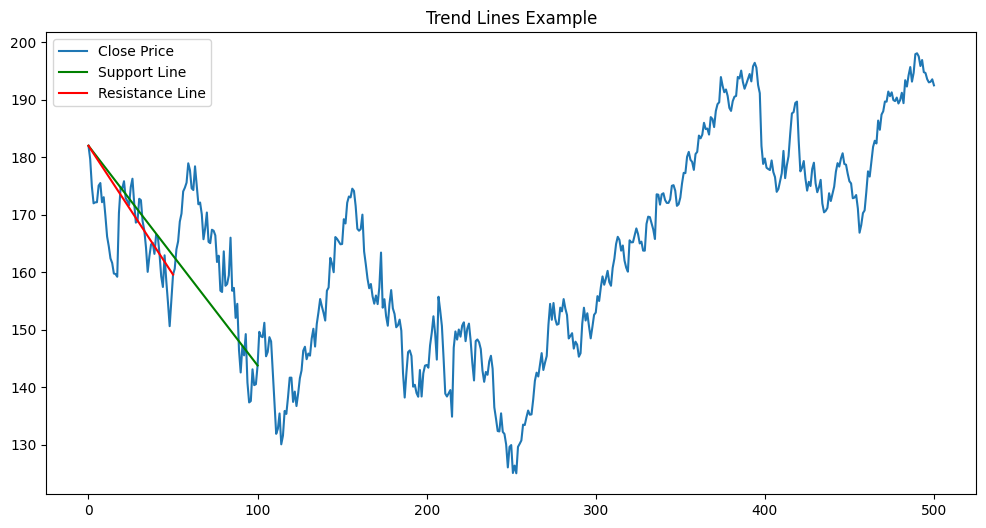

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Определим трендовые линии вручную (для примера)
support_line_start = (data.index[0], data['Close'].iloc[0])
support_line_end = (data.index[100], data['Close'].iloc[100])

resistance_line_start = (data.index[0], data['Close'].iloc[0])
resistance_line_end = (data.index[50], data['Close'].iloc[50])

# Добавим трендовые линии на график
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')

plt.plot([support_line_start[0], support_line_end[0]],
         [support_line_start[1], support_line_end[1]], label='Support Line', color='green')

plt.plot([resistance_line_start[0], resistance_line_end[0]],
         [resistance_line_start[1], resistance_line_end[1]], label='Resistance Line', color='red')

plt.legend(loc='best')
plt.title('Trend Lines Example')
plt.show()

### Шаг 3: Определение торговых сигналов
Теперь определим торговые сигналы на основе взаимодействия цены с трендовыми линиями.

In [4]:
# Преобразуем индексы в числовые значения для удобства
data.reset_index(inplace=True)

# Определим коэффициенты наклона и сдвига для линий
support_slope = (support_line_end[1] - support_line_start[1]) / (support_line_end[0].toordinal() - support_line_start[0].toordinal())
support_intercept = support_line_start[1] - support_slope * support_line_start[0].toordinal()

resistance_slope = (resistance_line_end[1] - resistance_line_start[1]) / (resistance_line_end[0].toordinal() - resistance_line_start[0].toordinal())
resistance_intercept = resistance_line_start[1] - resistance_slope * resistance_line_start[0].toordinal()

# Определим сигналы на покупку и продажу с использованием .loc
data['Support'] = support_slope * data['Date'].map(pd.Timestamp.toordinal) + support_intercept
data['Resistance'] = resistance_slope * data['Date'].map(pd.Timestamp.toordinal) + resistance_intercept

data['Signal'] = 0
data.loc[data['Close'] < data['Support'], 'Signal'] = 1  # Сигнал на покупку
data.loc[data['Close'] > data['Resistance'], 'Signal'] = -1  # Сигнал на продажу

### Шаг 4: Backtesting стратегии
Проведем тестирование стратегии на исторических данных.

In [6]:
# Начальные параметры
initial_balance = 10000  # Начальный баланс в USD
balance = initial_balance
position = 0  # Количество акций
data['Portfolio Value'] = balance

# Симуляция выполнения торговых операций
for index, row in data.iterrows():
    if row['Signal'] == 1 and balance > 0:  # Покупка
        position = balance / row['Close']
        balance = 0
        print(f"Buy {position:.2f} shares at {row['Close']:.2f} on {row['Date']}")
    elif row['Signal'] == -1 and position > 0:  # Продажа
        balance = position * row['Close']
        position = 0
        print(f"Sell shares at {row['Close']:.2f} on {row['Date']}")
    data.at[index, 'Portfolio Value'] = float(balance + (position * row['Close']))

# Оценка результатов
final_balance = balance + (position * data['Close'].iloc[-1])
profit = final_balance - initial_balance
print(f"Начальный баланс: ${initial_balance:.2f}")
print(f"Конечный баланс: ${final_balance:.2f}")
print(f"Прибыль: ${profit:.2f}")

Buy 55.65 shares at 179.70 on 2022-01-04 00:00:00
Sell shares at 174.78 on 2022-01-31 00:00:00
Buy 57.67 shares at 168.64 on 2022-02-11 00:00:00
Sell shares at 172.79 on 2022-02-15 00:00:00
Buy 59.57 shares at 167.30 on 2022-02-18 00:00:00
Sell shares at 165.12 on 2022-02-28 00:00:00
Buy 60.27 shares at 163.20 on 2022-03-01 00:00:00
Sell shares at 166.56 on 2022-03-02 00:00:00
Buy 61.52 shares at 163.17 on 2022-03-04 00:00:00
Sell shares at 162.95 on 2022-03-09 00:00:00
Buy 63.24 shares at 158.52 on 2022-03-10 00:00:00
Sell shares at 160.62 on 2022-03-17 00:00:00
Buy 73.95 shares at 137.35 on 2022-05-19 00:00:00
Sell shares at 143.11 on 2022-05-23 00:00:00
Buy 81.37 shares at 130.06 on 2022-06-16 00:00:00
Sell shares at 131.56 on 2022-06-17 00:00:00
Начальный баланс: $10000.00
Конечный баланс: $10705.50
Прибыль: $705.50


/var/folders/r8/f9pnzbcd4rq_1f11k5rtm6w40000gn/T/ipykernel_3019/1243459958.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9734.001176378782' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'Portfolio Value'] = float(balance + (position * row['Close']))


### Шаг 5: Визуализация результатов
Визуализируем результаты стратегии.

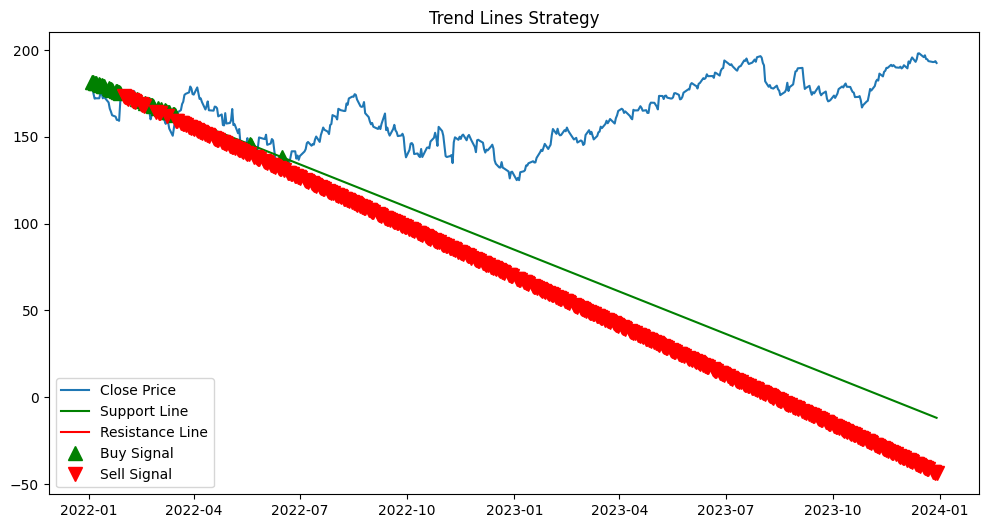

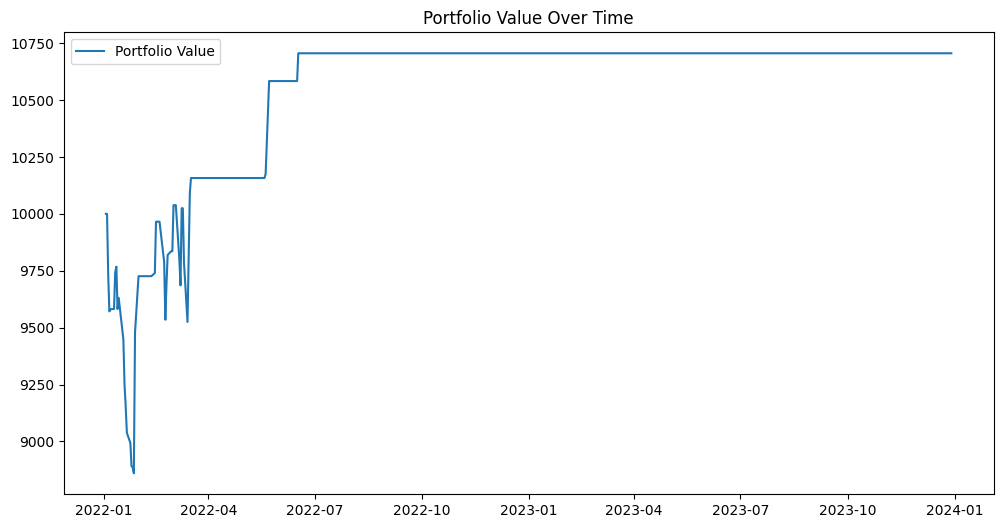

In [7]:
# Визуализация цен акций, трендовых линий и сигналов на покупку/продажу
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['Support'], label='Support Line', color='green')
plt.plot(data['Date'], data['Resistance'], label='Resistance Line', color='red')
plt.plot(data[data['Signal'] == 1]['Date'], data['Support'][data['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Signal'] == -1]['Date'], data['Resistance'][data['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.legend(loc='best')
plt.title('Trend Lines Strategy')
plt.show()

# Визуализация стоимости портфеля
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Portfolio Value'], label='Portfolio Value')
plt.legend(loc='best')
plt.title('Portfolio Value Over Time')
plt.show()

### Заключение
Стратегия, основанная на трендовых линиях, помогает трейдерам идентифицировать и следовать рыночным трендам, а также находить точки разворота. Несмотря на свою простоту, она является мощным инструментом для анализа рынка и принятия торговых решений. Важно правильно определять трендовые линии и учитывать возможные пробои, чтобы избежать ложных сигналов.